<a href="https://colab.research.google.com/github/Wolframettes/Noise/blob/master/Perlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#implement perlin noise

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import math as m

In [ ]:
from celluloid import Camera

In [ ]:
!pip install celluloid

In [10]:
def SquareLattice0(n):
    lattice = np.zeros([n,n], dtype='float')
    return lattice

In [115]:
rede = SquareLattice0(5000)

In [12]:
def Fator(lattice, possiveisfatores, posicaofator):#mete range nos possiveis fatores
    n = np.shape(lattice)[0]
    fatores = []
    for a in possiveisfatores: 
        if n%a == 0:
          fatores.append(a)
    if fatores == []:
        return 'sem fatores'
    return fatores[posicaofator]

In [116]:
p = Fator(rede,range(1,22),4)
p

8

In [14]:
def RandomVectors(fator): #FATOR É NUMERO DE areas NO LADO DA GRID NA GRID UNI-DIMENSIONAL
    mapa = {}
    for i in range(0,fator+1): # +1 pq a grid dos vetores vai nas bordas
        for j in range(0,fator+1):
            vetor = np.random.uniform(low=-1,high=1,size=2)
            modulo = m.sqrt(vetor[0]**2+vetor[1]**2)
            vetor = vetor/modulo
            mapa[(i,j)] = tuple(vetor) 
    return mapa

In [53]:
def PlotGradient(gradient):
    p = int(m.sqrt(len(gradient.keys())) - 1)
    rede = SquareLattice0(p+1)

    plt.plot()
    plt.imshow(rede)
    for i in range(0,p+1):
        for j in range(0,p+1):
            dx = list(gradient.values())[i*p+j][0]
            dy = list(gradient.values())[i*p+j][1]
            plt.arrow(i, j, dx, dy, length_includes_head=True) 
    return

In [56]:
gradient = RandomVectors(p) #  meti o + 1 na definição

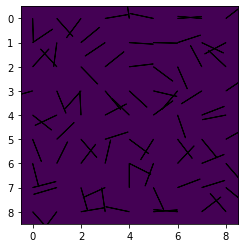

In [57]:
PlotGradient(gradient)

In [42]:
list(gradient.values())[1*20+3][0]

0.873638746023958

In [100]:
def dotGridGradient(ix,iy,x,y,gradient, n):

  p = m.sqrt(len(gradient.keys())) - 1

  #dx = x - ix
  #dy = y - iy
  # calcula o vetor distancia

  dx = (x - ix)/(n)
  dy = (y - iy)/(n)

  #print(ix/(n/p))
  #print(iy/(n/p))

  return dx*gradient[(ix/(n/p),iy/(n/p))][0] + dy*gradient[(ix/(n/p),iy/(n/p))][1]


In [18]:
def lerp(a0, a1, w):
  return (1.0 - w)*a0 + w*a1

In [109]:

def perlin(x,y,gradient, n): # n é tamanho do lado da lattice

    p = m.sqrt(len(gradient.keys())) - 1

    x0 = x - x%(n/p) # n/p eh o tamanho do lado um tyle da grid
    x1 = x0 + n/p 
    y0 = y - y%(n/p)
    y1 = y0 + n/p
  
   # sx = (n/p)- x%(n/p)
   # sy = (n/p) - y%(n/p)

    sx =  (x%(n/p))/(n/p)
    sy =  (y%(n/p))/(n/p)

    ij00 = dotGridGradient(x0, y0, x, y, gradient, n)
    ij10 = dotGridGradient(x1, y0, x, y, gradient, n)

    ix0 = lerp(ij00, ij10, sx)

    ij01 = dotGridGradient(x0, y1, x, y, gradient, n)
    ij11 = dotGridGradient(x1, y1, x, y, gradient, n)

    ix1 = lerp(ij01, ij11, sx)

    value = lerp(ix0, ix1, sy)


    return value


In [110]:
def perlinlattice(lattice, gradient):

    p = m.sqrt(len(gradient.keys()))
    n =  np.shape(lattice)[0] 
    for i in range(n):
        for j in range(n):
            lattice[i][j] = perlin(i,j,gradient,n)
            #print(j)
  
    return lattice

<function __main__.perlinlattice>

In [ ]:
perlinimage = perlinlattice(rede, gradient)

In [105]:
np.max(perlinimage)

6028.825321735618

In [112]:
def PlotLatticeGradient(lattice,gradient):
    p = int(m.sqrt(len(gradient.keys())) - 1)
    n =  int(np.shape(lattice)[0] )
    plt.plot()
    plt.imshow(lattice)

    arr_width=5

    for i in range(0,p+1):

        for j in range(0,p+1):

            dx = list(gradient.values())[i*p+j][0]*(n/p)
            dy = list(gradient.values())[i*p+j][1]*(n/p)
            plt.arrow(i*(n/p), j*(n/p), dx, dy, length_includes_head=False,head_starts_at_zero=False, width = arr_width, head_width = 3 * arr_width, 
    head_length = 9 * arr_width) 
    return

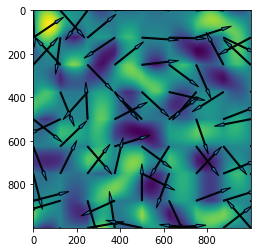

In [113]:
PlotLatticeGradient(perlinimage,gradient)

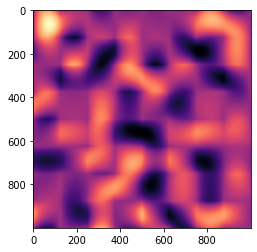

In [114]:
plt.imshow(perlinimage, cmap ='magma' )

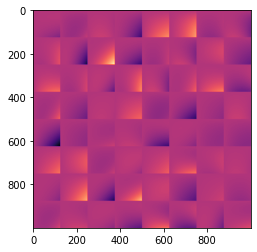

In [59]:
plt.imshow(perlinimage, cmap ='magma' )

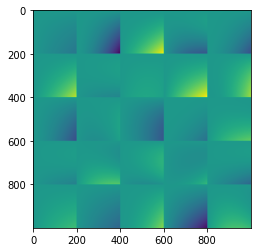

In [42]:
plt.imshow(perlinimage, cmap ='viridis' )

In [63]:
np.min(perlinimage)

-30815.024004204082

In [ ]:
def perlinCTE(x,y,gradient):

  x0 = x
  x1 = x + 1
  y0 = y
  y1 = y + 1

  # linha diferente do original que é
  #// Determine interpolation weights
  #  // Could also use higher order polynomial/s-curve here
  #  float sx = x - (float)x0;
  #  float sy = y - (float)y0;
  
  sx = 0.5
  sy = 0.5

  n0 = dotGridGradient(x0, y0, x, y, gradient)
  n1 = dotGridGradient(x1, y0, x, y, gradient)
  ix0 = lerp(n0, n1, sx)

  n0 = dotGridGradient(x0, y1, x, y, gradient)
  n1 = dotGridGradient(x1, y1, x, y, gradient)
  ix1 = lerp(n0, n1, sx)

  value = lerp(ix0, ix1, sy)


  return value

In [ ]:
def perlinCos(x,y,gradient):


  #int x0 = (int)x;
 # int x1 = x0 + 1;
 # int y0 = (int)y;
 # int y1 = y0 + 1;



  x0 = x
  x1 = x + 1
  y0 = y
  y1 = y + 1
  
  sx = abs(m.cos(x))
  sy = abs(m.cos(y))

  n0 = dotGridGradient(x0, y0, x, y, gradient)
  n1 = dotGridGradient(x1, y0, x, y, gradient)
  ix0 = lerp(n0, n1, sx)

  n0 = dotGridGradient(x0, y1, x, y, gradient)
  n1 = dotGridGradient(x1, y1, x, y, gradient)
  ix1 = lerp(n0, n1, sx)

  value = lerp(ix0, ix1, sy)


  return value

In [ ]:
grid = generate_lattice0(2000)

In [ ]:
mapa = generate_random_vectors(2000)



In [ ]:
def perlinCTEatgrid(grid, gradient):
    fim = grid
    for i in range(np.shape(grid)[0]-1):
      for j in range(np.shape(grid)[1]-1):
        fim[i][j] = perlinCTE(i,j, gradient)
    return fim

def perlinCosatgrid(grid, gradient):
    fim = grid
    for i in range(np.shape(grid)[0]-1):
      for j in range(np.shape(grid)[1]-1):
        fim[i][j] = perlinCos(i,j, gradient)
    return fim

In [ ]:
grid = perlinCTEatgrid(grid, mapa)

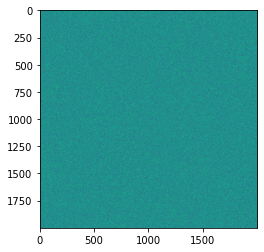

In [ ]:
plt.imshow(grid, cmap='viridis' )

In [ ]:
grid = perlinCosatgrid(grid, mapa)

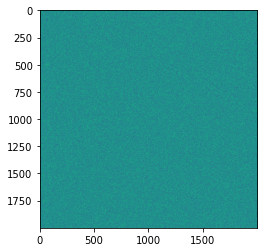

In [ ]:
plt.imshow(grid, cmap='viridis' )

In [ ]:
perlinCTE(5,300, mapa)

-0.15600557045341915

In [ ]:
dotGridGradient(1,2,3,4,mapa)

0.1448107151206437

In [ ]:


// Compute Perlin noise at coordinates x, y
float perlin(float x, float y) {

    // Determine grid cell coordinates
    int x0 = (int)x;
    int x1 = x0 + 1;
    int y0 = (int)y;
    int y1 = y0 + 1;

    // Determine interpolation weights
    // Could also use higher order polynomial/s-curve here
    float sx = x - (float)x0;
    float sy = y - (float)y0;

    // Interpolate between grid point gradients
    float n0, n1, ix0, ix1, value;

    n0 = dotGridGradient(x0, y0, x, y);
    n1 = dotGridGradient(x1, y0, x, y);
    ix0 = lerp(n0, n1, sx);

    n0 = dotGridGradient(x0, y1, x, y);
    n1 = dotGridGradient(x1, y1, x, y);
    ix1 = lerp(n0, n1, sx);

    value = lerp(ix0, ix1, sy);
    return value;
}

In [ ]:
// Computes the dot product of the distance and gradient vectors.
float dotGridGradient(int ix, int iy, float x, float y) {

    // Precomputed (or otherwise) gradient vectors at each grid node
    extern float Gradient[IYMAX][IXMAX][2];

    // Compute the distance vector
    float dx = x - (float)ix;
    float dy = y - (float)iy;

    // Compute the dot-product
    return (dx*Gradient[iy][ix][0] + dy*Gradient[iy][ix][1]);
}

In [ ]:
(1,2)[0]

1